In [1]:
!pip install numpy
!pip install matplotlib
!pip install graphviz

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def f(x):
    return 3*x**2 - 4*x + 5

In [4]:
f(3.0)

20.0

np.arange returns and array starting from -5, adding 0.25 for each new element upto but excluding 5

the function we defined above is a parabolic function

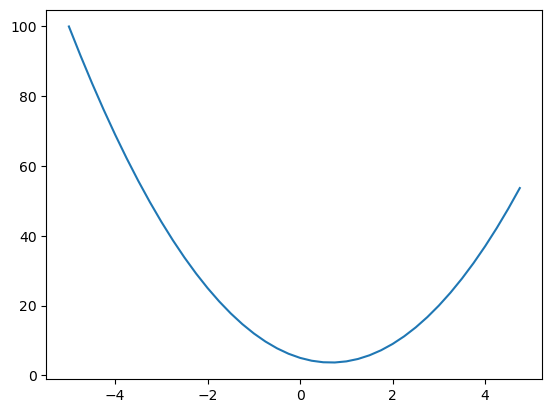

In [5]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

the basic definition of a derivative

In [6]:
h = 0.000000001
x = 2/3
(f(x + h) - f(x)) / h

0.0

In [7]:
#lets get more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [8]:
h = 0.0001

#inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1) / h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


the \_\_repr__ function returns a representation of the object when it is named without having to explicity print it

example:  
a = Value(2.0)  
a

#output:  
Value(data=2.0)

the \_\_add__ function is used for overwriting the functionality of the '+' operator  
python internally calls   
a.\_\_add__(b)

likewise for \_\_mul__


In [66]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0  # the gradient. the derivative of the output, with respect to the input(s). i.e. the change in output with change in input. we keep the default value when starting out at 0
        self._prev = set(_children) # children is the set of nodes on which the operation is performed
        self._op = _op  # op is the operation
        self.label = label  # to help us track variables along with their values

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        return out
    
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [10]:
d._op

'+'

In [30]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v): 
    # recursive function to get all the nodes and edges
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') note for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad, ), shape='record')
        if n._op:
            # if this value is the result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

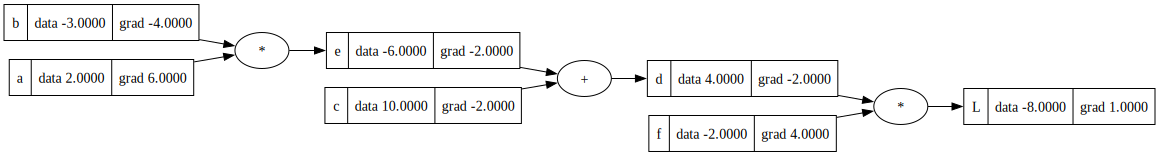

In [59]:
draw_dot(L)

In [60]:
# these are 'leaf' nodes, which we have control over
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

-7.286496


Manual Backpropagation:

L = d * f

dL/dd = f (basic differentiation)
dL/df = d

by the definition of derivatives  
(f(x+h) - f(x)) / h

((d+h)*f - d*f) / h
(d*f + h*f - d*f) / h
(h*f) / h
f

In [37]:
f.grad = 4.0
d.grad = -2.0

d = c + e

dd / dc = 1.0  
dd / de = 1.0

by the definition of derivatives  
((c+h) + e - (c+e)) / h  
(c + h + e - c - e) / h  
h / h  
1.0

WANT:  (by chain rule)
dL / dc = (dL / dd) * (dd / dc)

KNOW:  
dL / dd  
dd / dc

In [54]:
c.grad = -2.0
e.grad = -2.0

dL / de = -2.0

e = a * b
de / da = b
de / db = a

(chain rule)
dL / da = (dL / de) * (de / da)

In [55]:
a.grad = (-2.0 * -3.0)
b.grad = (-2.0 * 2.0)

In [58]:
def lol():

    h = 0.0001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(-3.0 + h, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data

    print((L2 - L1) / h)

lol()

-4.000000000008441


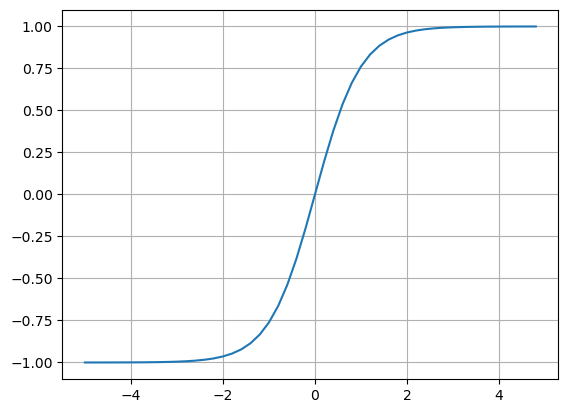

In [64]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2)))
plt.grid() # adds a grid to the background

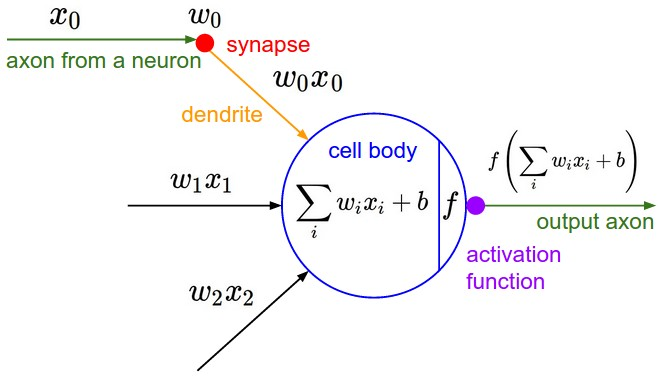

In [77]:
# inputs x1, x2 i.e. 2 inputs coming in
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

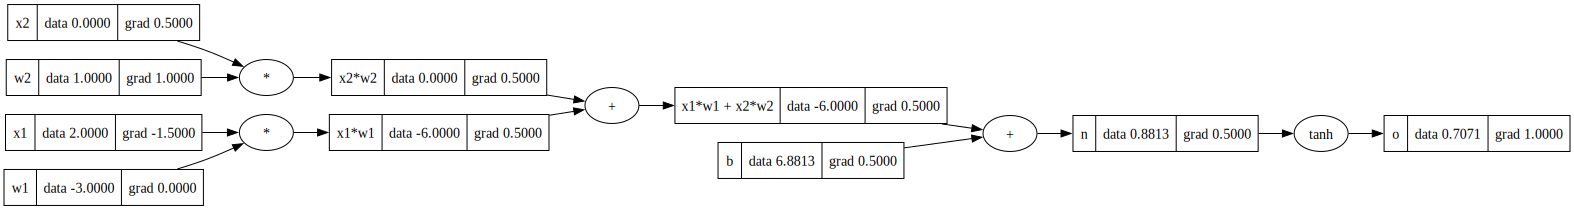

In [92]:
draw_dot(o)

In [82]:
o.grad = 1.0

In [85]:
n.grad = 0.5

In [89]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

In [88]:
x1w1.grad = 0.5
x2w2.grad = 0.5

In [90]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

In [91]:
x1.grad = w1.data * x1w1.grad
w2.grad = x1.data * x1w1.grad

In [81]:
1 - o.data**2

0.5000520352341944

In [ ]:
# o = tanh(n)
# do/dn = 1 - o**2